In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rcParams['font.weight']='normal'

mpl.rcParams['font.size']=14 #10 #16 pour posts

In [3]:

#lecture des fichiers

def load_df(fname):
    df=pd.DataFrame(data=np.loadtxt(fname),columns=['t','log10s','log10l'])
    df['s']=pow(10,df['log10s'])
    df['l']=df['log10l']
    df['logs2/l']=np.log(df['s']**2/df['l'])
    #df=df.drop(columns=['log10s','log10l'])
    return df
print(load_df("results/4FD/samples.gnu"))


/home/catB/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "results/4FD/samples.gnu"
  after removing the cwd from sys.path.


ValueError: Empty data passed with indices specified.

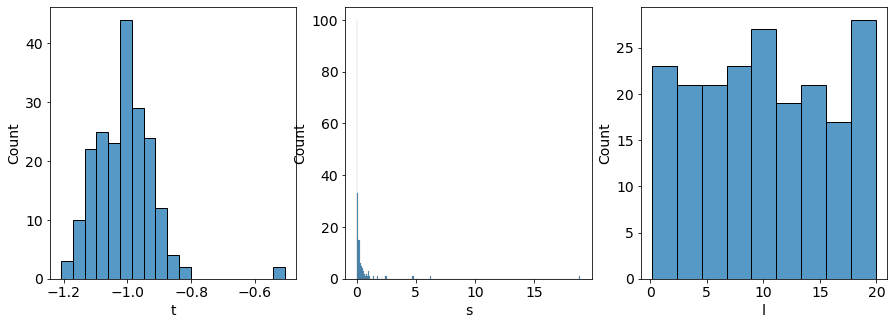

In [23]:
#affichage des densités FD.
samp4FD=load_df("results/4FD/samples.gnu")
fig,axs=plt.subplots(ncols=3,figsize=(15,5))
sns.histplot(x='t',data=samp4FD,ax=axs[0])
sns.histplot(x='s',data=samp4FD,ax=axs[1])
sns.histplot(x='l',data=samp4FD,ax=axs[2])





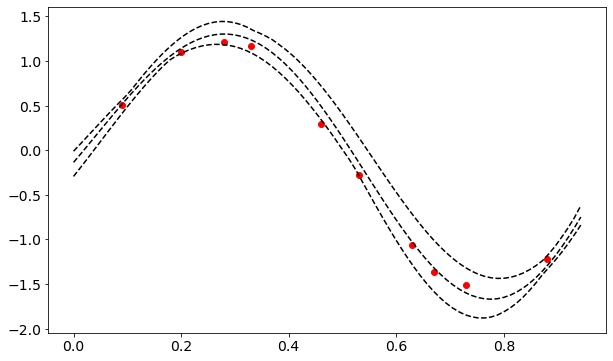

In [100]:
#affichage des prédictions
preds=pd.DataFrame(data=np.loadtxt('results/4FD/preds.gnu'),columns=['x','fzmean','stdfz','std1','fmean','q2p5','q97p5'])
obs=pd.DataFrame(data=np.loadtxt('results/4FD/obs.gnu'),columns=['x','y'])

plt.figure(figsize=(10,6))
plt.scatter(obs['x'],obs['y'],color='red')
#plt.plot(preds['x'],preds['fzmean'],color='black')
plt.plot(preds['x'],preds['fmean'],linestyle='--',color='black')
plt.plot(preds['x'],preds['q97p5'],linestyle='--',color='black')
plt.plot(preds['x'],preds['q2p5'],linestyle='--',color='black')


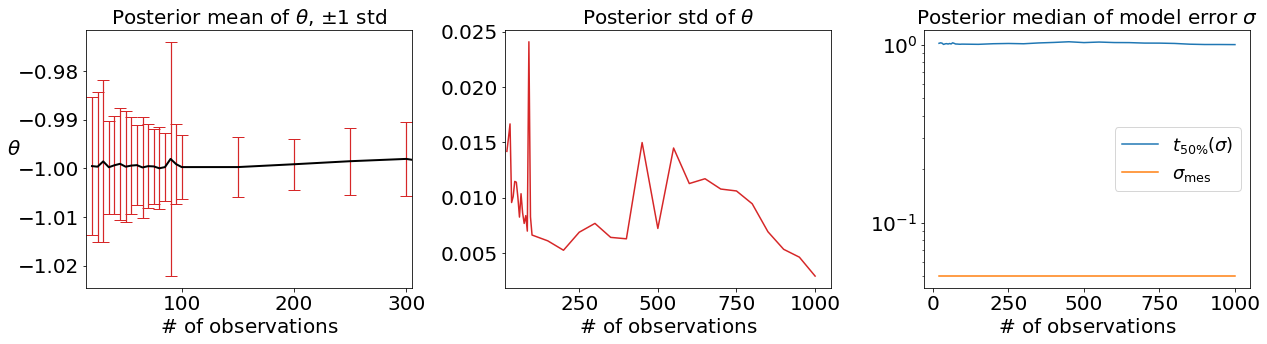

In [3]:
#affichage des qqplots. loading des fichiers. avec noise = 10-1. Ca fait plaiz. Essayons 10-2 ?mauvais mélange.
#un plot sur lequel il y a 3 axes : l'edm, theta, la variance de theta. Tout doit cvger vers 0. sauf theta tend vers -1 ofc.
cvgence=pd.DataFrame(data=np.loadtxt("results/cvgence.gnu"),columns=['npts','tmean','tstd','smean','sstd','smed'])
#hopt=pd.DataFrame(data=np.loadtxt("results/hoptmoinsun.gnu"),columns=['npts','s','l'])

cvgence=cvgence[cvgence['npts']>=20]

fig,axs=plt.subplots(ncols=3,figsize=(18,5))
axs[0].errorbar(cvgence['npts'],cvgence['tmean'],
             yerr=cvgence['tstd'],color='black',ecolor='tab:red',
            elinewidth=1.2,capsize=6,linewidth=2)
axs[0].set_xlabel(r'$\#$ of observations',fontsize=20)
axs[0].set_ylabel(r'$\theta$',fontsize=20,rotation=0)
axs[0].set_title(r'Posterior mean of $\theta$, $\pm 1$ std',fontsize=20)
axs[0].set_xlim([15,305])
#axs[0].plot([15,305],[-1,-1],linestyle='--',color='black')
axs[0].tick_params(axis='both', labelsize=20)


axs[1].set_title(r'Posterior std of $\theta$',fontsize=20)
axs[1].plot(cvgence['npts'],cvgence['tstd'],color='tab:red')
axs[1].set_xlim([15,1050])
axs[1].tick_params(axis='both', labelsize=20)
axs[1].set_xlabel(r'$\#$ of observations',fontsize=20)
#axs[0].set_xticks(fontsize=20)
#axs[0].set_yticks(fontsize=20)
#axs[0].errorbar(cvgence['npts'],cvgence['tmean'],yerr=cvgence['tstd'])
#axs[0].plot([cvgence['npts'][0],np.array(cvgence['npts'])[-1]],[-1,-1],color='black',linestyle='--')
#axs[1].plot(hopt['npts'],10**hopt['s'])
#axs[1].set_yscale('log')

#axs[1].plot([cvgence['npts'][0],np.array(cvgence['npts'])[-1]],[0,0],color='black',linestyle='--')

#demain : essayer quoi ? en fait : je vois beaucoup l'erreur du surrogate je pense. Observations plus espacées ? 
#noise = 5e-2.


noise=0.05*np.ones(len(cvgence['npts']))
axs[2].plot(cvgence['npts'],cvgence['smed'],label=r'$t_{50\%}(\sigma)$')
axs[2].plot(cvgence['npts'],noise,label=r'$\sigma_\mathrm{mes}$')
axs[2].set_yscale('log')
axs[2].legend(fontsize=18)
#axs[2].set_ylim([1e-4,1])
axs[2].tick_params(axis='both', labelsize=20)
axs[2].set_xlabel(r'$\#$ of observations',fontsize=20)
axs[2].set_title(r'Posterior median of model error $\sigma$',fontsize=20)

plt.tight_layout()

20


Text(0.5, 1.0, 'Posterior median of model error $\\sigma$')

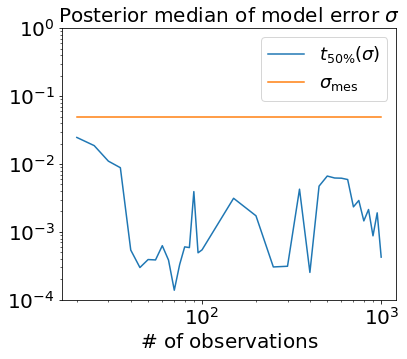

In [184]:
#affichage de l'edm. Il faut que je mette les obs à 150,200,250,300 pour montrer que ça ne converge pas.
hopt=pd.DataFrame(data=np.loadtxt("results/hoptmoinsun.gnu"),columns=['npts','s','l'])
cvgence=pd.DataFrame(data=np.loadtxt("results/cvgence.gnu"),columns=['npts','tmean','tstd','smean','sstd','smed'])
#hopt=pd.DataFrame(data=np.loadtxt("results/hoptmoinsun.gnu"),columns=['npts','s','l'])

cvgence=cvgence[cvgence['npts']>=20]
fig,axs=plt.subplots(ncols=1,figsize=(6,5))
print(len(hopt['npts']))
noise=0.05*np.ones(len(cvgence['npts']))
axs.plot(cvgence['npts'],cvgence['smed'],label=r'$t_{50\%}(\sigma)$')
axs.plot(cvgence['npts'],noise,label=r'$\sigma_\mathrm{mes}$')
axs.set_yscale('log')
axs.set_xscale('log')
axs.legend(fontsize=18)
axs.set_ylim([1e-4,1])
axs.tick_params(axis='both', labelsize=20)
axs.set_xlabel(r'$\#$ of observations',fontsize=20)
axs.set_title(r'Posterior median of model error $\sigma$',fontsize=20)

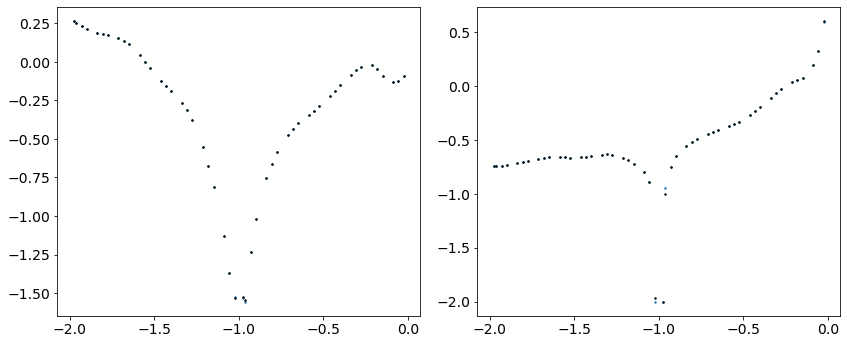

In [88]:
#affichage des qqplots. loading des fichiers. avec noise = 10-2
hgps=pd.DataFrame(data=np.loadtxt("results/hgps100.gnu"),columns=['t','s1','s2','l1','l2'])

fig,axs=plt.subplots(ncols=2,figsize=(12,5))
axs[0].scatter('t','s1',data=hgps,s=2)
axs[1].scatter('t','l1',data=hgps,s=2)
axs[0].scatter('t','s2',data=hgps,s=2,color='black')
axs[1].scatter('t','l2',data=hgps,s=2,color='black')
plt.tight_layout()


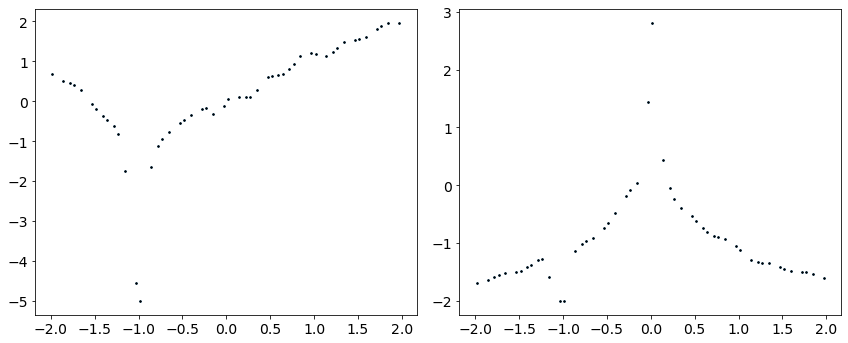

In [23]:
#affichage des qqplots. loading des fichiers. avec noise = 10-2
hgps=pd.DataFrame(data=np.loadtxt("results/hgps.gnu"),columns=['t','s1','s2','l1','l2'])

fig,axs=plt.subplots(ncols=2,figsize=(12,5))
axs[0].scatter('t','s1',data=hgps,s=2)
axs[1].scatter('t','l1',data=hgps,s=2)
axs[0].scatter('t','s2',data=hgps,s=2,color='black')
axs[1].scatter('t','l2',data=hgps,s=2,color='black')
plt.tight_layout()


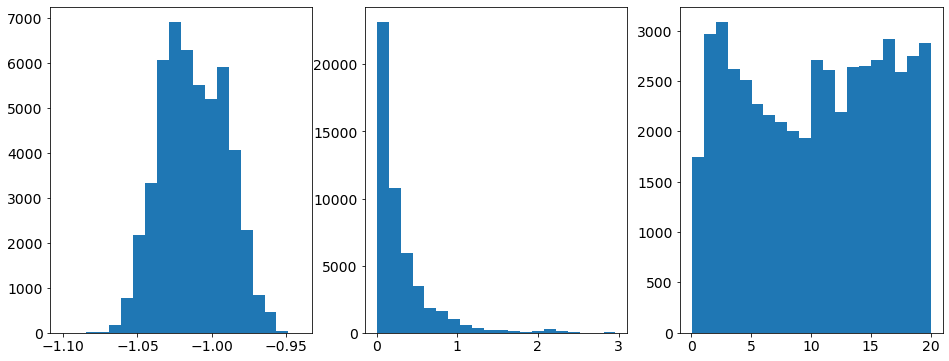

In [160]:
filename="results/4ID/samples.gnu"
plot_post(filename)

In [136]:
def plot_autocor(filename):
    df=pd.DataFrame(data=np.loadtxt(filename),columns=['theta','sigma','l'])
    fig,axs=plt.subplots(nrows=1,ncols=3,figsize=[16,6])
    nbins=20
    x=range(len(df['theta']))
    axs[0].plot(x,df['theta'])
    axs[1].plot(x,df['sigma'])
    axs[2].plot(x,df['l'])

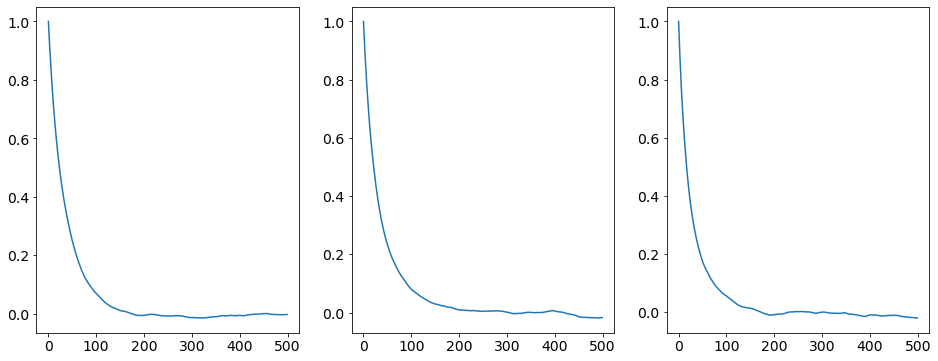

In [161]:
filename="results/init/autocor.gnu"
plot_autocor(filename)

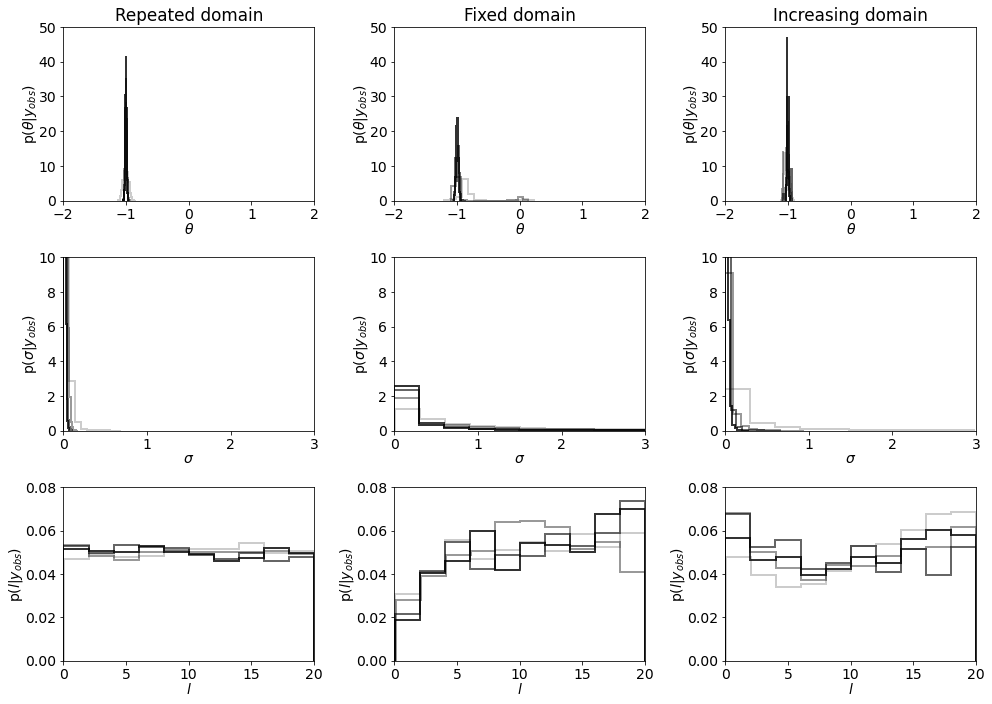

In [34]:
#affichage des densités avec très grand nombre d'observations.





ps=30
#fonction pour plotter un dataframe

def plot_hists(filenamelist,axs):
    #names: liste de 4 noms avec les fichiers
    #axs: liste de 3 axes sur lesquels on plotte les histogrammes
    #lapha: suite des alpha des histogrammes.
    lalpha=[0.2,0.4,0.6,0.8]
    lw=2
    nbins=15
    for idx,filename in enumerate(filenamelist):
        df=pd.DataFrame(data=np.loadtxt(filename),columns=['theta','sigma','l'])
        axs[0].hist(df['theta'],histtype="step",linewidth=lw,color='black',alpha=lalpha[idx],bins=nbins,density=True)
        axs[1].hist(df['sigma'],histtype="step",linewidth=lw,color='black',alpha=lalpha[idx],density=True)
        axs[2].hist(df['l'],histtype="step",linewidth=lw,color='black',alpha=lalpha[idx],density=True)
    

flistID=["results/4ID/samples.gnu",
       "results/5ID/samples.gnu",
       "results/6ID/samples.gnu",
       "results/7ID/samples.gnu"
      ]
flistRD=["results/4RD/samples.gnu",
       "results/5RD/samples.gnu",
       "results/6RD/samples.gnu",
       "results/7RD/samples.gnu"
      ]
flistFD=["results/4FD/samples.gnu",
       "results/5FD/samples.gnu",
       "results/6FD/samples.gnu",
       "results/7FD/samples.gnu"
      ]


fig,axs=plt.subplots(ncols=3,nrows=3,figsize=[14,10])

#qqplots


plot_hists(flistRD,[axs[0,0],axs[1,0],axs[2,0]])
plot_hists(flistFD,[axs[0,1],axs[1,1],axs[2,1]])
plot_hists(flistID,[axs[0,2],axs[1,2],axs[2,2]])



#labels
tlabel=r'p$(\theta|y_{obs})$'
slabel=r'p$(\sigma|y_{obs})$'
llabel=r'p$(l|y_{obs})$'

txlabel=r'$\theta$'
sxlabel=r'$\sigma$'
lxlabel=r'$l$'

xlim_t=[-2,2]
ylim_t=[0,50]
xlim_s=[0,3]
ylim_s=[0,10]
xlim_l=[0,20]
ylim_l=[0,8e-2]

for i in range(3):
    lp=0
    lpx=0
    axs[0,i].set_ylabel(tlabel,labelpad=lp)
    axs[0,i].set_xlabel(txlabel,labelpad=lpx)
    axs[0,i].set_xlim(xlim_t)
    axs[0,i].set_ylim(ylim_t)
    axs[1,i].set_ylabel(slabel,labelpad=lp)
    axs[1,i].set_xlabel(sxlabel,labelpad=lpx)
    axs[1,i].set_xlim(xlim_s)
    axs[1,i].set_ylim(ylim_s)
    axs[2,i].set_ylabel(llabel,labelpad=lp)
    axs[2,i].set_xlabel(lxlabel,labelpad=lpx)
    axs[2,i].set_xlim(xlim_l)
    axs[2,i].set_ylim(ylim_l)
    
axs[0,0].set_title(r'Repeated domain')
axs[0,1].set_title(r'Fixed domain')
axs[0,2].set_title(r'Increasing domain')

    
plt.tight_layout()

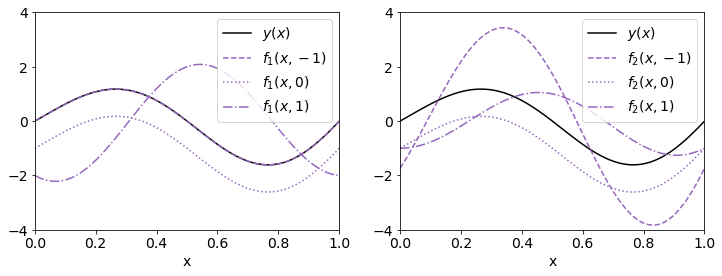

In [21]:
#affichage
#plot pour donner une idée du modèle



def y(x):
    return np.exp(2*3.14*x/10)*np.sin(2*3.14*x)

def f1(x,theta):
    #well specified
    return y(x)-np.abs(theta+1)*(np.sin(2*3.14*theta*x)+np.cos(2*3.14*x*theta))

def f2(x,theta):
    #misspecified
    return y(x)-np.sqrt(theta**2-theta+1)*(np.sin(2*3.14*theta*x)+np.cos(2*3.14*x*theta))

X=np.linspace(0,1,100)
fig,axs=plt.subplots(figsize=[12,4],ncols=2,nrows=1)
axs[0].plot(X,y(X),color='black',label=r'$y(x)$')
axs[0].plot(X,f1(X,-1),color='tab:purple',label=r'$f_1(x,-1)$',linestyle='--')
axs[0].plot(X,f1(X,0),color='tab:purple',label=r'$f_1(x,0)$',linestyle=':')
axs[0].plot(X,f1(X,1),color='tab:purple',label=r'$f_1(x,1)$',linestyle='-.')
axs[0].set_xlim([0,1])
#ax.set_ylim([0,1.1])
axs[0].set_xlabel('x')

axs[1].plot(X,y(X),color='black',label=r'$y(x)$')
axs[1].plot(X,f2(X,-1),color='tab:purple',label=r'$f_2(x,-1)$',linestyle='--')
axs[1].plot(X,f2(X,0),color='tab:purple',label=r'$f_2(x,0)$',linestyle=':')
axs[1].plot(X,f2(X,1),color='tab:purple',label=r'$f_2(x,1)$',linestyle='-.')
axs[1].set_xlim([0,1])
axs[0].set_ylim([-4,4])
axs[1].set_ylim([-4,4])
axs[1].set_xlabel('x')
axs[1].legend()
axs[0].legend()

